## **Lab 7 - Model comparison**

In [2]:
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

F - number of letters in first name L - number of letters in last name

In [3]:
F = 3
L = 13
N = (L+F)*100

#### **Task 1: Generate data**

1. Compile code_1.stan and code_2.stan

In [4]:
data1 = dict(N = N)
data_generator_code1 = CmdStanModel(stan_file = 'code_1.stan')

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_1.stan to exe file C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_1.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_1.exe


In [5]:
result_code1 = data_generator_code1.sample(data = data1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 1 |█▎        | 00:01 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:01 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:02 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:02 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:03 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:03 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:04 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:05 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:05 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 00:05 Sampling completed                      
chain 2 |██████████| 00:05 Sampling completed                      
chain 3 |██████████| 00:05 Sampling completed                      
chain 4 |██████████|


INFO:cmdstanpy:CmdStan done processing.


In [6]:
data_generator_code2 = CmdStanModel(stan_file = 'code_2.stan')
result_code2 = data_generator_code2.sample(data = data1)

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_2.stan to exe file C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_2.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_2.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:02 Iteration:   1 / 1000 [  0%]  (Sampling)



chain 1 |█▎        | 00:04 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:06 Iteration: 200 / 1000 [ 20%]  (Sampling)

chain 1 |██▎       | 00:09 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:11 Iteration: 400 / 1000 [ 40%]  (Sampling)



chain 1 |███▏      | 00:14 Iteration: 500 / 1000 [ 50%]  (Sampling)

chain 1 |███▋      | 00:16 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:19 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:21 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |███


INFO:cmdstanpy:CmdStan done processing.


2. Generate data for the rest of the excercises.

In [7]:
X = result_code2.stan_variable('X')[0]
print(len(X))

1600


In [8]:
x1 = result_code1.draws_pd()
print(x1)

      lp__  accept_stat__  theta      y[1]      y[2]      y[3]      y[4]  \
0      0.0            0.0   0.01 -0.232298  0.839875  0.046562  0.055347   
1      0.0            0.0   0.01 -0.312616 -2.769320  1.212140 -0.391039   
2      0.0            0.0   0.01  0.210111  0.330559 -1.056020 -2.583310   
3      0.0            0.0   0.01 -0.845899 -1.331180  0.570990 -0.757699   
4      0.0            0.0   0.01  0.571530 -0.401159  1.114730  0.181413   
...    ...            ...    ...       ...       ...       ...       ...   
3995   0.0            0.0   0.01 -1.269130  0.505571  0.021981 -0.543671   
3996   0.0            0.0   0.01 -0.804325 -0.948791  0.980672 -1.116000   
3997   0.0            0.0   0.01  1.248880 -0.865156  0.555353 -0.523588   
3998   0.0            0.0   0.01 -1.363330 -0.778549  0.016766  0.682768   
3999   0.0            0.0   0.01  1.350000  0.629264  0.098979 -1.390170   

          y[5]      y[6]      y[7]  ...   y[1591]   y[1592]   y[1593]  \
0     0.749735

In [9]:
y1 = x1.iloc[:, 3:]
y1_mean = y1.mean()
print(y1_mean)

y[1]       0.066709
y[2]       0.140641
y[3]       0.133078
y[4]       0.066746
y[5]       0.080149
             ...   
y[1596]    0.097906
y[1597]    0.099929
y[1598]    0.112650
y[1599]    0.113764
y[1600]    0.102554
Length: 1600, dtype: float64


In [10]:
x2 = result_code2.draws_pd()

In [11]:
print(x2)

      lp__  accept_stat__    X[1,1]    X[2,1]    X[3,1]    X[4,1]    X[5,1]  \
0      0.0            0.0  1.336840  0.841520  1.648440 -0.355497 -1.078000   
1      0.0            0.0 -0.379696  0.009830  0.358477  1.723500  1.695250   
2      0.0            0.0 -0.870242 -0.201638  0.269176 -0.987704 -0.099080   
3      0.0            0.0 -0.844596  0.906381  0.471389  0.007645  0.390196   
4      0.0            0.0  0.375412 -0.356714  1.009450  1.374830 -0.548721   
...    ...            ...       ...       ...       ...       ...       ...   
3995   0.0            0.0  0.153725  0.723063  0.238429 -0.842624  2.392340   
3996   0.0            0.0  0.457502  1.436850 -1.040430 -0.293330  0.848394   
3997   0.0            0.0  2.153280  1.792720  1.217430 -0.414738  1.631670   
3998   0.0            0.0 -2.408860  0.320235 -0.579934 -1.501740  0.647145   
3999   0.0            0.0 -0.365716  0.266518 -0.418337  0.529888  1.369080   

        X[6,1]    X[7,1]    X[8,1]  ...   y[1591]  

In [12]:
y2 = x2.iloc[:,-1600:]

In [13]:
print(x2.iloc[:,-1600:])

          y[1]      y[2]      y[3]      y[4]      y[5]      y[6]      y[7]  \
0     3.501030  1.692380  1.723570  2.617000 -2.595360 -1.384470 -0.882368   
1     0.061867 -0.765217  3.318820  0.749663  2.154670 -6.429980 -5.378540   
2    -0.670724  0.242345 -1.524520 -1.842520  0.454621  1.658700  4.507780   
3    -0.727524  1.831940  0.749200  3.753890 -0.457939 -2.338980  2.021170   
4     3.309290 -0.037620  1.597950  3.446140 -1.148140 -3.083380  2.124800   
...        ...       ...       ...       ...       ...       ...       ...   
3995 -0.575615  1.707510  2.065940 -1.376140  2.688680  1.423350 -2.567950   
3996  1.872760  3.426870 -2.716710 -0.941985  2.726790  0.991183  1.706610   
3997  2.943980  4.320860  0.475956 -1.293380  3.549690 -5.566700  2.476950   
3998 -4.638880 -1.720070 -0.602607 -4.473330  1.601460 -5.149810  3.073800   
3999 -5.013340 -1.114580 -0.635295  2.487760  2.110830 -2.277380  0.123441   

          y[8]      y[9]     y[10]  ...   y[1591]   y[1592]   y

In [14]:
y2_mean = y2.mean(axis = 0)
print(y2_mean)

y[1]      -0.035487
y[2]       0.032375
y[3]       0.029532
y[4]      -0.009891
y[5]      -0.006309
             ...   
y[1596]    0.034649
y[1597]   -0.034035
y[1598]    0.031944
y[1599]   -0.018935
y[1600]   -0.072697
Length: 1600, dtype: float64


#### **Task 2: Optimizing the hyperparameters**

1. Compile both models.

2. Fit both models.

In [15]:
data_generator_code3 = CmdStanModel(stan_file='code_3.stan')

data3_1 = dict(N=N,
                 y=y1_mean)

result_code3_1 = data_generator_code3.sample(data = data3_1)

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_3.stan to exe file C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_3.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_3.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▊   | 00:03 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:05 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:06 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:07 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:08 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:09 Iteration: 1800 


INFO:cmdstanpy:CmdStan done processing.


In [16]:
data3_2 = dict(N=N,
                 y=y2_mean)

result_code3_2 = data_generator_code3.sample(data = data3_2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:03 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:05 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |████████▋ | 00:06 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |█████████ | 00:07 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:08 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:09 Sampling completed                       
chain 2 |██████████| 00:09 Sampling completed                       
chain 3 |██████████| 00:09 Sampling completed                       
chain 4 |██████████| 00:09 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [17]:
data_generator_code4 = CmdStanModel(stan_file='code_4.stan')

data4_1 = dict(N=N,
                 y=y1_mean)

result_code4_1 = data_generator_code4.sample(data = data4_1)

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_4.stan to exe file C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_4.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_4.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (W


INFO:cmdstanpy:CmdStan done processing.


In [18]:
data4_2 = dict(N=N,
                 y=y2_mean)

result_code4_2 = data_generator_code4.sample(data = data4_2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:01 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:02 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:02 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:03 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:05 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:06 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 0


INFO:cmdstanpy:CmdStan done processing.


3. Using az.compare and az.plot_compare analyze both models using loo and waic criteria.

In [19]:
import arviz as az

Model3:

In [20]:
az.loo(result_code3_1)

Computed from 4000 by 1600 log-likelihood matrix

         Estimate       SE
elpd_loo  3503.90    28.91
p_loo        2.12        -

In [21]:
az.loo(result_code3_2)

Computed from 4000 by 1600 log-likelihood matrix

         Estimate       SE
elpd_loo  2912.10    27.67
p_loo        1.92        -

In [22]:
az.waic(result_code3_1)

Computed from 4000 by 1600 log-likelihood matrix

          Estimate       SE
elpd_waic  3503.90    28.91
p_waic        2.12        -

In [23]:
az.waic(result_code3_2)

Computed from 4000 by 1600 log-likelihood matrix

          Estimate       SE
elpd_waic  2912.10    27.67
p_waic        1.92        -

Model4:

In [24]:
az.loo(result_code4_1)

Computed from 4000 by 1600 log-likelihood matrix

         Estimate       SE
elpd_loo  3503.32    28.69
p_loo        2.23        -

In [25]:
az.loo(result_code4_2)

Computed from 4000 by 1600 log-likelihood matrix

         Estimate       SE
elpd_loo  2910.29    27.82
p_loo        2.05        -

In [26]:
az.waic(result_code4_1)

Computed from 4000 by 1600 log-likelihood matrix

          Estimate       SE
elpd_waic  3503.32    28.69
p_waic        2.23        -

In [27]:
az.waic(result_code4_2)

Computed from 4000 by 1600 log-likelihood matrix

          Estimate       SE
elpd_waic  2910.29    27.82
p_waic        2.05        -

Comparison:

In [28]:
rz_code3_1 = az.from_cmdstanpy(result_code3_1)
rz_code3_2 = az.from_cmdstanpy(result_code3_2)

In [29]:
code3_compare = az.compare({"1":rz_code3_1, "2":rz_code3_2})
print(code3_compare)

c:\Users\igach\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


   rank          loo     p_loo       d_loo   weight         se       dse  \
1     0  3503.898251  2.122560    0.000000  0.92527  28.910313   0.00000   
2     1  2912.095406  1.920023  591.802845  0.07473  27.668108  40.51771   

   warning loo_scale  
1    False       log  
2    False       log  


c:\Users\igach\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


<AxesSubplot:xlabel='Log'>

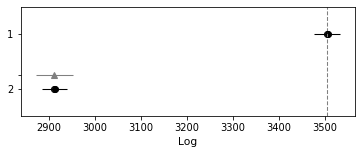

In [30]:
az.plot_compare(code3_compare)

In [31]:
rz_code4_1 = az.from_cmdstanpy(result_code4_1)
rz_code4_2 = az.from_cmdstanpy(result_code4_2)

In [32]:
code4_compare = az.compare({"1":rz_code4_1, "2":rz_code4_2})
print(code4_compare)

c:\Users\igach\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


   rank          loo     p_loo       d_loo    weight         se        dse  \
1     0  3503.318161  2.231713    0.000000  0.920637  28.689567   0.000000   
2     1  2910.289333  2.051390  593.028828  0.079363  27.819243  40.423731   

   warning loo_scale  
1    False       log  
2    False       log  


c:\Users\igach\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


<AxesSubplot:xlabel='Log'>

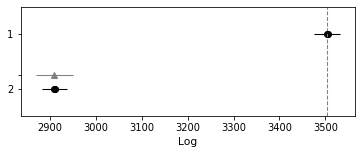

In [33]:
az.plot_compare(code4_compare)

#### **Task 3: Compare models with different numbers of predictors**

1. Compile model.

In [34]:
data_generator_code5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_5.stan to exe file C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_5.exe
INFO:cmdstanpy:compiled model executable: C:\Users\igach\Desktop\Python_folder\Topic_7 — kopia\code_5.exe


2. Compare models for 1, 2 and 3 predictors as in previous excercise.

1 predictor:

In [35]:
nxm = []
for i in X[:,0]:
    nxm.append([i])

code5_pred_1 = dict(N=N, K=1, y=np.array(y2_mean), X=nxm)
pred_1_result = data_generator_code5.sample(data = code5_pred_1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:03 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:04 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:05 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:07 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:08 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:09 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:11 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█


INFO:cmdstanpy:CmdStan done processing.


2 predictor:

In [36]:
nxm = []
matrix_temp = X[:, 0:2]

for i in matrix_temp:
    vect = []
    for j in i:
        vect.append(j)
    nxm.append(vect)

code5_pred_2 = dict(N=N, K=2, y=np.array(y2_mean), X=nxm)
pred_2_result = data_generator_code5.sample(data = code5_pred_2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:03 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:04 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:05 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:08 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:09 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:10 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:11 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 


INFO:cmdstanpy:CmdStan done processing.


3 predictor:

In [37]:
nxm = []
matrix_temp = X[:,0:3]

for i in matrix_temp:
    vect = []
    for j in i:
        vect.append(j)
    nxm.append(vect)

code5_pred_3 = dict(N=N, K=3, y=np.array(y2_mean), X=nxm)
pred_3_result = data_generator_code5.sample(data = code5_pred_3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:04 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:05 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |███████▋  | 00:06 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:07 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:08 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:09 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:11 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |█


INFO:cmdstanpy:CmdStan done processing.


In [38]:
az.loo(pred_1_result)

Computed from 4000 by 1600 log-likelihood matrix

         Estimate       SE
elpd_loo  2912.61    27.55
p_loo        1.90        -

In [39]:
az.loo(pred_2_result)

Computed from 4000 by 1600 log-likelihood matrix

         Estimate       SE
elpd_loo  2912.55    27.46
p_loo        2.96        -

In [40]:
az.loo(pred_3_result)

Computed from 4000 by 1600 log-likelihood matrix

         Estimate       SE
elpd_loo  2911.40    27.49
p_loo        4.11        -

In [41]:
az.waic(pred_1_result)

Computed from 4000 by 1600 log-likelihood matrix

          Estimate       SE
elpd_waic  2912.61    27.55
p_waic        1.90        -

In [42]:
az.waic(pred_2_result)

Computed from 4000 by 1600 log-likelihood matrix

          Estimate       SE
elpd_waic  2912.55    27.46
p_waic        2.96        -

In [43]:
az.waic(pred_3_result)

Computed from 4000 by 1600 log-likelihood matrix

          Estimate       SE
elpd_waic  2911.40    27.49
p_waic        4.11        -

In [44]:
code5_compare_pred_1 = az.from_cmdstanpy(pred_1_result)
code5_compare_pred_2 = az.from_cmdstanpy(pred_2_result)
code5_compare_pred_3 = az.from_cmdstanpy(pred_3_result)

compare_result_model5 = az.compare({"1":code5_compare_pred_1, "2":code5_compare_pred_2, "3":code5_compare_pred_3})
compare_result_model5

c:\Users\igach\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\igach\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
c:\Users\igach\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
1,0,2912.614487,1.903657,0.000000,0.531184,27.549341,0.000000,False,log
2,1,2912.553175,2.961650,0.061312,0.468816,27.458123,1.415931,False,log
3,2,2911.395087,4.113301,1.219400,0.000000,27.486274,1.444961,False,log


<AxesSubplot:xlabel='Log'>

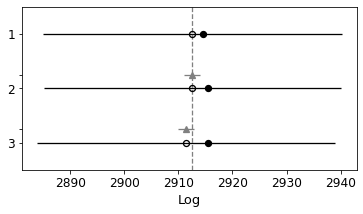

In [45]:
az.plot_compare(compare_result_model5)